In [1]:
import sys
sys.path.append("..")
import numpy as np
import networkx as nx
from scipy.stats import entropy
import matplotlib.pyplot as plt
import random

%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim

import func.entropy_estimators as ee

In [2]:
#EI的求解
from func.EI_calculation import tpm_ei

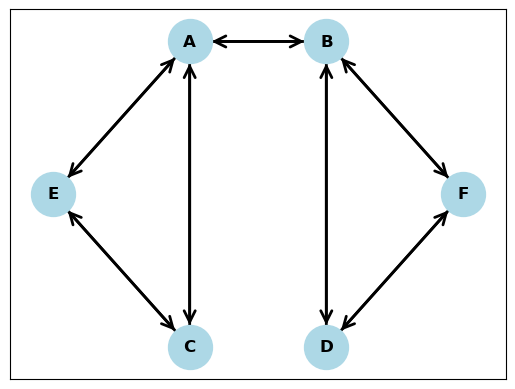

In [3]:
# 创建一个空的有向图
G = nx.DiGraph()
# 添加节点
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F'])
# 添加边
G.add_edges_from([('A', 'B'), ('B', 'A'), ('A', 'C'), ('C', 'A'), ('A', 'E'), ('C', 'E'), ('E', 'C'), ('B', 'D'), 
                  ('D', 'B'), ('D', 'F'), ('F', 'D'), ('B', 'F'), ('E', 'A'), ('F', 'B')])
# 明确指定节点的位置
pos = {'A': (1, 2), 'B': (2, 2), 'C': (1, 0), 'D': (2, 0), 'E': (0, 1), 'F': (3, 1)}
# 绘制图形
nx.draw_networkx(G, pos=pos, with_labels=True, node_color='lightblue', font_weight='bold', arrows=True, 
                 labels={node: node for node in G.nodes()}, node_size=1000, width=2, arrowstyle='->', arrowsize=20)
# 显示图形
plt.show()

# ACE或——BDF或

## 整体

In [4]:
Col = ['{:06b}'.format(i) for i in range(64)]
ABCDEF = np.empty((64, 64))

for i in range(ABCDEF.shape[0]):
    
    if Col[i][1] == '1' or Col[i][2] == '1' or Col[i][4] == '1':   # 对A 进行判断
        pa = np.array([0, 1])
    else:
        pa = np.array([1, 0])
        
    if Col[i][0] == '1' or Col[i][3] == '1' or Col[i][5] == '1':   # 对B 进行判断
        pb = np.array([0.1, 0.9])
    else:
        pb = np.array([0.9, 0.1])

    if Col[i][0] == '1' or Col[i][4] == '1' :   # 对C 进行判断
        pc = np.array([0, 1])
    else:
        pc = np.array([1, 0])
    
    if Col[i][1] == '1' or Col[i][5] == '1' :   # 对D 进行判断
        pd = np.array([0.1, 0.9])
    else:
        pd = np.array([0.9, 0.1])
        
    if Col[i][0] == '1' or Col[i][2] == '1' :   # 对E 进行判断
        pe = np.array([0, 1])
    else:
        pe = np.array([1, 0])

    if Col[i][1] == '1' or Col[i][3] == '1' :   # 对F 进行判断
        pf = np.array([0.1, 0.9])
    else:
        pf = np.array([0.9, 0.1])
        
    print(pa,pb,pc,pd,pe,pf)
    pe_pf = np.kron(pe, pf)
    pd_pe_pf = np.kron(pd, pe_pf)
    pc_pd_pe_pf = np.kron(pc, pd_pe_pf)
    pb_pc_pd_pe_pf = np.kron(pb, pc_pd_pe_pf)
    pa_pb_pc_pd_pe_pf = np.kron(pa, pb_pc_pd_pe_pf)
    
    print(pa_pb_pc_pd_pe_pf)
    
    ABCDEF[i] = pa_pb_pc_pd_pe_pf

print(ABCDEF)

[1 0] [0.9 0.1] [1 0] [0.9 0.1] [1 0] [0.9 0.1]
[0.729 0.081 0.    0.    0.081 0.009 0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.081 0.009 0.    0.    0.009 0.001 0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.   ]
[1 0] [0.1 0.9] [1 0] [0.1 0.9] [1 0] [0.9 0.1]
[0.009 0.001 0.    0.    0.081 0.009 0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.081 0.009 0.    0.    0.729 0.081 0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.   ]
[0 1] [0.9 0.1] [0 1] [0.9 0.1] [1 0] [0.9 0.1]
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0. 

In [5]:
ABCDEF_ei = tpm_ei(ABCDEF, log_base = 2)
ABCDEF_ei

2.9008312476221096

## ACE

In [6]:
Col = ['{:03b}'.format(i) for i in range(8)]
ACE_B_0 = np.empty((8, 8))
B_0 = False

for i in range(ACE_B_0.shape[0]):  
    if Col[i][1] == '1' or Col[i][2] == '1' or B_0:   # 对A 进行判断
        pa = np.array([0, 1])
    else:
        pa = np.array([1, 0])

    if Col[i][0] == '1' or Col[i][2] == '1' :   # 对C 进行判断
        pc = np.array([0, 1])
    else:
        pc = np.array([1, 0])
        
    if Col[i][0] == '1' or Col[i][1] == '1' :   # 对E 进行判断
        pe = np.array([0, 1])
    else:
        pe = np.array([1, 0])

    pc_pe = np.kron(pc, pe)
    pa_pc_pe = np.kron(pa, pc_pe)
   
    ACE_B_0[i] = pa_pc_pe

print(ACE_B_0)

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [7]:
Col = ['{:03b}'.format(i) for i in range(8)]
ACE_B_1 = np.empty((8, 8))
B_1 = True
for i in range(ACE_B_1.shape[0]):  
    if Col[i][1] == '1' or Col[i][2] == '1' or B_1:   # 对A 进行判断
        pa = np.array([0, 1])
    else:
        pa = np.array([1, 0])

    if Col[i][0] == '1' or Col[i][2] == '1' :   # 对C 进行判断
        pc = np.array([0, 1])
    else:
        pc = np.array([1, 0])
        
    if Col[i][0] == '1' or Col[i][1] == '1' :   # 对E 进行判断
        pe = np.array([0, 1])
    else:
        pe = np.array([1, 0])

    pc_pe = np.kron(pc, pe)
    pa_pc_pe = np.kron(pa, pc_pe)
   
    ACE_B_1[i] = pa_pc_pe

print(ACE_B_1)

[[0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [8]:
ACE_B_0_ei = tpm_ei(ACE_B_0, log_base = 2)  #同质、B为0的时候ACE的ei
ACE_B_0_ei

2.0

In [9]:
ACE_B_1_ei = tpm_ei(ACE_B_1, log_base = 2)  #同质、B为1的时候ACE的ei
ACE_B_1_ei

1.5487949406953987

In [10]:
ACE_B_ei = (ACE_B_0_ei + ACE_B_1_ei) / 2   #异质、ACE的ei
ACE_B_ei

1.7743974703476995

## BDF

In [11]:
Col = ['{:03b}'.format(i) for i in range(8)]
BDF_A_0 = np.empty((8, 8))
A_0 = False

for i in range(BDF_A_0.shape[0]):  
    if Col[i][1] == '1' or Col[i][2] == '1' or A_0:   # 对B 进行判断
        pb = np.array([0.1, 0.9])
    else:
        pb = np.array([0.9, 0.1])

    if Col[i][0] == '1' or Col[i][2] == '1' :   # 对D 进行判断
        pd = np.array([0.1, 0.9])
    else:
        pd = np.array([0.9, 0.1])
        
    if Col[i][0] == '1' or Col[i][1] == '1' :   # 对F 进行判断
        pf = np.array([0.1, 0.9])
    else:
        pf = np.array([0.9, 0.1])

    pd_pf = np.kron(pd, pf)
    pb_pd_pf = np.kron(pb, pd_pf)
   
    BDF_A_0[i] = pb_pd_pf

print(BDF_A_0)

[[0.729 0.081 0.081 0.009 0.081 0.009 0.009 0.001]
 [0.009 0.001 0.081 0.009 0.081 0.009 0.729 0.081]
 [0.009 0.081 0.001 0.009 0.081 0.729 0.009 0.081]
 [0.001 0.009 0.009 0.081 0.009 0.081 0.081 0.729]
 [0.009 0.081 0.081 0.729 0.001 0.009 0.009 0.081]
 [0.001 0.009 0.009 0.081 0.009 0.081 0.081 0.729]
 [0.001 0.009 0.009 0.081 0.009 0.081 0.081 0.729]
 [0.001 0.009 0.009 0.081 0.009 0.081 0.081 0.729]]


In [12]:
Col = ['{:03b}'.format(i) for i in range(8)]
BDF_A_1 = np.empty((8, 8))
A_1 = True

for i in range(BDF_A_1.shape[0]):  
    if Col[i][1] == '1' or Col[i][2] == '1' or A_1:   # 对B 进行判断
        pb = np.array([0.1, 0.9])
    else:
        pb = np.array([0.9, 0.1])

    if Col[i][0] == '1' or Col[i][2] == '1' :   # 对D 进行判断
        pd = np.array([0.1, 0.9])
    else:
        pd = np.array([0.9, 0.1])
        
    if Col[i][0] == '1' or Col[i][1] == '1' :   # 对F 进行判断
        pf = np.array([0.1, 0.9])
    else:
        pf = np.array([0.9, 0.1])

    pd_pf = np.kron(pd, pf)
    pb_pd_pf = np.kron(pb, pd_pf)
   
    BDF_A_1[i] = pb_pd_pf

print(BDF_A_1)

[[0.081 0.009 0.009 0.001 0.729 0.081 0.081 0.009]
 [0.009 0.001 0.081 0.009 0.081 0.009 0.729 0.081]
 [0.009 0.081 0.001 0.009 0.081 0.729 0.009 0.081]
 [0.001 0.009 0.009 0.081 0.009 0.081 0.081 0.729]
 [0.001 0.009 0.009 0.081 0.009 0.081 0.081 0.729]
 [0.001 0.009 0.009 0.081 0.009 0.081 0.081 0.729]
 [0.001 0.009 0.009 0.081 0.009 0.081 0.081 0.729]
 [0.001 0.009 0.009 0.081 0.009 0.081 0.081 0.729]]


In [13]:
BDF_A_0_ei = tpm_ei(BDF_A_0, log_base = 2)  #同质、A为0的时候BDF的ei
BDF_A_0_ei

1.1228211945075317

In [14]:
BDF_A_1_ei = tpm_ei(BDF_A_1, log_base = 2)  #同质、A为0的时候BDF的ei
BDF_A_1_ei

0.7992726322942094

In [15]:
BDF_A_ei =(BDF_A_0_ei + BDF_A_1_ei) / 2         #异质、BDF的ei
BDF_A_ei

0.9610469134008706

```python

均采用   或   运算、ACE无噪音、BDF的噪音为0.1

          局部节点     邻居节点        ei值
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
  ABCDEF      -         -            2.9008312476221096
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
ACE_B_0_ei    ACE       B(B=0)         2.0
ACE_B_1_ei    ACE       B(B=1)          1.5487949406953987
 ACE_B_ei     ACE       B(异质)         1.7743974703476995
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
BDF_A_0_ei    BDF       A(A=0)          1.1228211945075315
BDF_A_1_ei    BDF       A(A=1)          0.7992726322942094
 BDF_A_ei     BDF       A(异质)          0.9610469134008705

```

# ACE与——BDF与

## 整体

In [16]:
Col = ['{:06b}'.format(i) for i in range(64)]
ABCDEF = np.empty((64, 64))
for i in range(ABCDEF.shape[0]):
    if Col[i][1] == '1' and Col[i][2] == '1' and Col[i][4] == '1':   # 对A 进行判断
        pa = np.array([0, 1])
    else:
        pa = np.array([1, 0]) 
    if Col[i][0] == '1' and Col[i][3] == '1' and Col[i][5] == '1':   # 对B 进行判断
        pb = np.array([0.1, 0.9])
    else:
        pb = np.array([0.9, 0.1])
    if Col[i][0] == '1' and Col[i][4] == '1' :   # 对C 进行判断
        pc = np.array([0, 1])
    else:
        pc = np.array([1, 0])
    if Col[i][1] == '1' and Col[i][5] == '1' :   # 对D 进行判断
        pd = np.array([0.1, 0.9])
    else:
        pd = np.array([0.9, 0.1])
    if Col[i][0] == '1' and Col[i][2] == '1' :   # 对E 进行判断
        pe = np.array([0, 1])
    else:
        pe = np.array([1, 0])
    if Col[i][1] == '1' and Col[i][3] == '1' :   # 对F 进行判断
        pf = np.array([0.1, 0.9])
    else:
        pf = np.array([0.9, 0.1])
    pa_pb_pc_pd_pe_pf = np.kron(pa, np.kron(pb, np.kron(pc, np.kron(pd, np.kron(pe, pf)))))
    ABCDEF[i] = pa_pb_pc_pd_pe_pf


In [17]:
print(tpm_ei(ABCDEF, log_base = 2))

2.9008312476221096


## ACE

In [18]:
#ACE
Col = ['{:03b}'.format(i) for i in range(8)]
ACE_B_0 = np.empty((8, 8))
B_0 = False

for i in range(ACE_B_0.shape[0]):  
    if Col[i][1] == '1' and Col[i][2] == '1' and B_0:   # 对A 进行判断
        pa = np.array([0, 1])
    else:
        pa = np.array([1, 0])
    if Col[i][0] == '1' and Col[i][2] == '1' :   # 对C 进行判断
        pc = np.array([0, 1])
    else:
        pc = np.array([1, 0])
    if Col[i][0] == '1' and Col[i][1] == '1' :   # 对E 进行判断
        pe = np.array([0, 1])
    else:
        pe = np.array([1, 0])
    pa_pc_pe = np.kron(pa, np.kron(pc, pe))
    ACE_B_0[i] = pa_pc_pe

    
ACE_B_1 = np.empty((8, 8))
B_1 = True
for i in range(ACE_B_1.shape[0]):  
    if Col[i][1] == '1' and Col[i][2] == '1' and B_1:   # 对A 进行判断
        pa = np.array([0, 1])
    else:
        pa = np.array([1, 0])
    if Col[i][0] == '1' and Col[i][2] == '1' :   # 对C 进行判断
        pc = np.array([0, 1])
    else:
        pc = np.array([1, 0])
    if Col[i][0] == '1' and Col[i][1] == '1' :   # 对E 进行判断
        pe = np.array([0, 1])
    else:
        pe = np.array([1, 0])
    pa_pc_pe = np.kron(pa, np.kron(pc, pe))
    ACE_B_1[i] = pa_pc_pe


In [19]:
print(tpm_ei(ACE_B_0, log_base = 2))  #同质、B为0的时候ACE的ei
print(tpm_ei(ACE_B_1, log_base = 2))  #同质、B为1的时候ACE的ei
print((tpm_ei(ACE_B_0, log_base = 2) + tpm_ei(ACE_B_1, log_base = 2)) / 2)   #异质、ACE的ei

1.5487949406953987
2.0
1.7743974703476995


## BDF

In [20]:
Col = ['{:03b}'.format(i) for i in range(8)]
BDF_A_0 = np.empty((8, 8))
A_0 = False
for i in range(BDF_A_0.shape[0]):  
    if Col[i][1] == '1' and Col[i][2] == '1' and A_0:   # 对B 进行判断
        pb = np.array([0.1, 0.9])
    else:
        pb = np.array([0.9, 0.1])
    if Col[i][0] == '1' and Col[i][2] == '1' :   # 对D 进行判断
        pd = np.array([0.1, 0.9])
    else:
        pd = np.array([0.9, 0.1]) 
    if Col[i][0] == '1' and Col[i][1] == '1' :   # 对F 进行判断
        pf = np.array([0.1, 0.9])
    else:
        pf = np.array([0.9, 0.1])
    pb_pd_pf = np.kron(pb, np.kron(pd, pf))
    BDF_A_0[i] = pb_pd_pf

    
BDF_A_1 = np.empty((8, 8))
A_1 = True
for i in range(BDF_A_1.shape[0]):  
    if Col[i][1] == '1' and Col[i][2] == '1' and A_1:   # 对B 进行判断
        pb = np.array([0.1, 0.9])
    else:
        pb = np.array([0.9, 0.1])
    if Col[i][0] == '1' and Col[i][2] == '1' :   # 对D 进行判断
        pd = np.array([0.1, 0.9])
    else:
        pd = np.array([0.9, 0.1])
    if Col[i][0] == '1' and Col[i][1] == '1' :   # 对F 进行判断
        pf = np.array([0.1, 0.9])
    else:
        pf = np.array([0.9, 0.1])
    pb_pd_pf = np.kron(pb, np.kron(pd, pf))
    BDF_A_1[i] = pb_pd_pf


In [21]:
print(tpm_ei(BDF_A_0, log_base = 2))  #同质、A为0的时候BDF的ei
print(tpm_ei(BDF_A_1, log_base = 2))  #同质、A为0的时候BDF的ei
print((tpm_ei(BDF_A_0, log_base = 2) + tpm_ei(BDF_A_1, log_base = 2)) / 2)  #异质、BDF的ei

0.7992726322942094
1.1228211945075317
0.9610469134008706


```python

均采用   与   运算、ACE无噪音、BDF的噪音为0.1

          局部节点     邻居节点        ei值
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
  ABCDEF      -         -           2.9008312476221096
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
ACE_B_0_ei    ACE       B(B=0)          1.5487949406953987
ACE_B_1_ei    ACE       B(B=1)          2.0
 ACE_B_ei     ACE       B(异质)         1.7743974703476995
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
BDF_A_0_ei    BDF       A(A=0)          0.7992726322942094
BDF_A_1_ei    BDF       A(A=1)          1.1228211945075317
 BDF_A_ei     BDF       A(异质)          0.9610469134008706

```

# ACE异或——BDF异或

## 整体

In [22]:
Col = ['{:06b}'.format(i) for i in range(64)]
ABCDEF = np.empty((64, 64))
for i in range(ABCDEF.shape[0]):
    if (Col[i][1] == '1') ^ (Col[i][2] == '1') ^ (Col[i][4] == '1'):   # 对A 进行判断
        pa = np.array([0, 1])
    else:
        pa = np.array([1, 0]) 
    if (Col[i][0] == '1') ^ (Col[i][3] == '1') ^ (Col[i][5] == '1'):   # 对B 进行判断
        pb = np.array([0.1, 0.9])
    else:
        pb = np.array([0.9, 0.1])
    if (Col[i][0] == '1') ^ (Col[i][4] == '1') :   # 对C 进行判断
        pc = np.array([0, 1])
    else:
        pc = np.array([1, 0])
    if (Col[i][1] == '1') ^ (Col[i][5] == '1') :   # 对D 进行判断
        pd = np.array([0.1, 0.9])
    else:
        pd = np.array([0.9, 0.1])
    if (Col[i][0] == '1') ^ (Col[i][2] == '1') :   # 对E 进行判断
        pe = np.array([0, 1])
    else:
        pe = np.array([1, 0])
    if (Col[i][1] == '1') ^ (Col[i][3] == '1') :   # 对F 进行判断
        pf = np.array([0.1, 0.9])
    else:
        pf = np.array([0.9, 0.1])
    pa_pb_pc_pd_pe_pf = np.kron(pa, np.kron(pb, np.kron(pc, np.kron(pd, np.kron(pe, pf)))))
    ABCDEF[i] = pa_pb_pc_pd_pe_pf


In [23]:
print(tpm_ei(ABCDEF, log_base = 2))

4.593013219232156


## ACE

In [24]:
#ACE
Col = ['{:03b}'.format(i) for i in range(8)]
ACE_B_0 = np.empty((8, 8))
B_0 = False

for i in range(ACE_B_0.shape[0]):  
    if (Col[i][1] == '1') ^ (Col[i][2] == '1') ^ B_0:   # 对A 进行判断
        pa = np.array([0, 1])
    else:
        pa = np.array([1, 0])
    if (Col[i][0] == '1') ^ (Col[i][2] == '1') :   # 对C 进行判断
        pc = np.array([0, 1])
    else:
        pc = np.array([1, 0])
    if (Col[i][0] == '1') ^ (Col[i][1] == '1') :   # 对E 进行判断
        pe = np.array([0, 1])
    else:
        pe = np.array([1, 0])
    pa_pc_pe = np.kron(pa, np.kron(pc, pe))
    ACE_B_0[i] = pa_pc_pe

    
ACE_B_1 = np.empty((8, 8))
B_1 = True
for i in range(ACE_B_1.shape[0]):  
    if (Col[i][1] == '1') ^ (Col[i][2] == '1') ^ B_1:   # 对A 进行判断
        pa = np.array([0, 1])
    else:
        pa = np.array([1, 0])
    if (Col[i][0] == '1') ^ (Col[i][2] == '1') :   # 对C 进行判断
        pc = np.array([0, 1])
    else:
        pc = np.array([1, 0])
    if (Col[i][0] == '1') ^ (Col[i][1] == '1') :   # 对E 进行判断
        pe = np.array([0, 1])
    else:
        pe = np.array([1, 0])
    pa_pc_pe = np.kron(pa, np.kron(pc, pe))
    ACE_B_1[i] = pa_pc_pe


In [25]:
print(tpm_ei(ACE_B_0, log_base = 2))  #同质、B为0的时候ACE的ei
print(tpm_ei(ACE_B_1, log_base = 2))  #同质、B为1的时候ACE的ei
print((tpm_ei(ACE_B_0, log_base = 2) + tpm_ei(ACE_B_1, log_base = 2)) / 2)   #异质、ACE的ei

2.0
2.0
2.0


## BDF

In [26]:
Col = ['{:03b}'.format(i) for i in range(8)]
BDF_A_0 = np.empty((8, 8))
A_0 = False
for i in range(BDF_A_0.shape[0]):  
    if (Col[i][1] == '1') ^ (Col[i][2] == '1') ^ A_0:   # 对B 进行判断
        pb = np.array([0.1, 0.9])
    else:
        pb = np.array([0.9, 0.1])
    if (Col[i][0] == '1') ^ (Col[i][2] == '1') :   # 对D 进行判断
        pd = np.array([0.1, 0.9])
    else:
        pd = np.array([0.9, 0.1]) 
    if (Col[i][0] == '1') ^ (Col[i][1] == '1') :   # 对F 进行判断
        pf = np.array([0.1, 0.9])
    else:
        pf = np.array([0.9, 0.1])
    pb_pd_pf = np.kron(pb, np.kron(pd, pf))
    BDF_A_0[i] = pb_pd_pf

    
BDF_A_1 = np.empty((8, 8))
A_1 = True
for i in range(BDF_A_1.shape[0]):  
    if (Col[i][1] == '1') ^ (Col[i][2] == '1') ^ A_1:   # 对B 进行判断
        pb = np.array([0.1, 0.9])
    else:
        pb = np.array([0.9, 0.1])
    if (Col[i][0] == '1') ^ (Col[i][2] == '1') :   # 对D 进行判断
        pd = np.array([0.1, 0.9])
    else:
        pd = np.array([0.9, 0.1])
    if (Col[i][0] == '1') ^ (Col[i][1] == '1') :   # 对F 进行判断
        pf = np.array([0.1, 0.9])
    else:
        pf = np.array([0.9, 0.1])
    pb_pd_pf = np.kron(pb, np.kron(pd, pf))
    BDF_A_1[i] = pb_pd_pf


In [27]:
print(tpm_ei(BDF_A_0, log_base = 2))  #同质、A为0的时候BDF的ei
print(tpm_ei(BDF_A_1, log_base = 2))  #同质、A为0的时候BDF的ei
print((tpm_ei(BDF_A_0, log_base = 2) + tpm_ei(BDF_A_1, log_base = 2)) / 2)  #异质、BDF的ei

1.3946423208177685
1.3946423208177685
1.3946423208177685


```python

均采用   异或   运算、ACE无噪音、BDF的噪音为0.1

          局部节点     邻居节点        ei值
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
  ABCDEF      -         -           4.593013219232156
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
ACE_B_0_ei    ACE       B(B=0)          2.0
ACE_B_1_ei    ACE       B(B=1)          2.0
 ACE_B_ei     ACE       B(异质)         2.0
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
BDF_A_0_ei    BDF       A(A=0)         1.3946423208177685
BDF_A_1_ei    BDF       A(A=1)         1.3946423208177685
 BDF_A_ei     BDF       A(异质)         1.3946423208177685

```

# ACE同或——BDF同或

## 整体

In [28]:
Col = ['{:06b}'.format(i) for i in range(64)]
ABCDEF = np.empty((64, 64))
for i in range(ABCDEF.shape[0]):
    if (Col[i][1] == '1') ^ (Col[i][2] == '1') ^ (Col[i][4] == '1'):   # 对A 进行判断    同或异或一样
        pa = np.array([0, 1])
    else:
        pa = np.array([1, 0]) 
    if (Col[i][0] == '1') ^ (Col[i][3] == '1') ^ (Col[i][5] == '1'):   # 对B 进行判断
        pb = np.array([0.1, 0.9])
    else:
        pb = np.array([0.9, 0.1])
        
    if (Col[i][0] == '1') ^ (Col[i][4] == '1') :   # 对C 进行判断     概率相反
        pc = np.array([1, 0])
    else:
        pc = np.array([0, 1])
    if (Col[i][1] == '1') ^ (Col[i][5] == '1') :   # 对D 进行判断
        pd = np.array([0.9, 0.1])
    else:
        pd = np.array([0.1, 0.9])
    if (Col[i][0] == '1') ^ (Col[i][2] == '1') :   # 对E 进行判断
        pe = np.array([1, 0])
    else:
        pe = np.array([0, 1])
    if (Col[i][1] == '1') ^ (Col[i][3] == '1') :   # 对F 进行判断
        pf = np.array([0.9, 0.1])
    else:
        pf = np.array([0.1, 0.9])
    pa_pb_pc_pd_pe_pf = np.kron(pa, np.kron(pb, np.kron(pc, np.kron(pd, np.kron(pe, pf)))))
    ABCDEF[i] = pa_pb_pc_pd_pe_pf


In [29]:
print(tpm_ei(ABCDEF, log_base = 2))

4.593013219232156


## ACE

In [30]:
#ACE
Col = ['{:03b}'.format(i) for i in range(8)]
ACE_B_0 = np.empty((8, 8))
B_0 = False

for i in range(ACE_B_0.shape[0]):  
    if (Col[i][1] == '1') ^ (Col[i][2] == '1') ^ B_0:   # 对A 进行判断
        pa = np.array([0, 1])
    else:
        pa = np.array([1, 0])
    if (Col[i][0] == '1') ^ (Col[i][2] == '1') :   # 对C 进行判断
        pc = np.array([1, 0])
    else:
        pc = np.array([0, 1])
    if (Col[i][0] == '1') ^ (Col[i][1] == '1') :   # 对E 进行判断
        pe = np.array([1, 0])
    else:
        pe = np.array([0, 1])
    pa_pc_pe = np.kron(pa, np.kron(pc, pe))
    ACE_B_0[i] = pa_pc_pe

    
ACE_B_1 = np.empty((8, 8))
B_1 = True
for i in range(ACE_B_1.shape[0]):  
    if (Col[i][1] == '1') ^ (Col[i][2] == '1') ^ B_1:   # 对A 进行判断
        pa = np.array([0, 1])
    else:
        pa = np.array([1, 0])
    if (Col[i][0] == '1') ^ (Col[i][2] == '1') :   # 对C 进行判断
        pc = np.array([1, 0])
    else:
        pc = np.array([0, 1])
    if (Col[i][0] == '1') ^ (Col[i][1] == '1') :   # 对E 进行判断
        pe = np.array([1, 0])
    else:
        pe = np.array([0, 1])
    pa_pc_pe = np.kron(pa, np.kron(pc, pe))
    ACE_B_1[i] = pa_pc_pe


In [31]:
print(tpm_ei(ACE_B_0, log_base = 2))  #同质、B为0的时候ACE的ei
print(tpm_ei(ACE_B_1, log_base = 2))  #同质、B为1的时候ACE的ei
print((tpm_ei(ACE_B_0, log_base = 2) + tpm_ei(ACE_B_1, log_base = 2)) / 2)   #异质、ACE的ei

2.0
2.0
2.0


## BDF

In [32]:
Col = ['{:03b}'.format(i) for i in range(8)]
BDF_A_0 = np.empty((8, 8))
A_0 = False
for i in range(BDF_A_0.shape[0]):  
    if (Col[i][1] == '1') ^ (Col[i][2] == '1') ^ A_0:   # 对B 进行判断
        pb = np.array([0.1, 0.9])
    else:
        pb = np.array([0.9, 0.1])
    if (Col[i][0] == '1') ^ (Col[i][2] == '1') :   # 对D 进行判断
        pd = np.array([0.9, 0.1])
    else:
        pd = np.array([0.1, 0.9]) 
    if (Col[i][0] == '1') ^ (Col[i][1] == '1') :   # 对F 进行判断
        pf = np.array([0.9, 0.1])
    else:
        pf = np.array([0.1, 0.9])
    pb_pd_pf = np.kron(pb, np.kron(pd, pf))
    BDF_A_0[i] = pb_pd_pf

    
BDF_A_1 = np.empty((8, 8))
A_1 = True
for i in range(BDF_A_1.shape[0]):  
    if (Col[i][1] == '1') ^ (Col[i][2] == '1') ^ A_1:   # 对B 进行判断
        pb = np.array([0.1, 0.9])
    else:
        pb = np.array([0.9, 0.1])
    if (Col[i][0] == '1') ^ (Col[i][2] == '1') :   # 对D 进行判断
        pd = np.array([0.9, 0.1])
    else:
        pd = np.array([0.1, 0.9])
    if (Col[i][0] == '1') ^ (Col[i][1] == '1') :   # 对F 进行判断
        pf = np.array([0.9, 0.1])
    else:
        pf = np.array([0.1, 0.9])
    pb_pd_pf = np.kron(pb, np.kron(pd, pf))
    BDF_A_1[i] = pb_pd_pf


In [33]:
print(tpm_ei(BDF_A_0, log_base = 2))  #同质、A为0的时候BDF的ei
print(tpm_ei(BDF_A_1, log_base = 2))  #同质、A为0的时候BDF的ei
print((tpm_ei(BDF_A_0, log_base = 2) + tpm_ei(BDF_A_1, log_base = 2)) / 2)  #异质、BDF的ei

1.3946423208177685
1.3946423208177685
1.3946423208177685


```python

均采用   同或  运算、ACE无噪音、BDF的噪音为0.1

          局部节点     邻居节点        ei值
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
  ABCDEF      -         -           4.593013219232156
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
ACE_B_0_ei    ACE       B(B=0)          2.0
ACE_B_1_ei    ACE       B(B=1)          2.0
 ACE_B_ei     ACE       B(异质)         2.0
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
BDF_A_0_ei    BDF       A(A=0)          1.3946423208177685
BDF_A_1_ei    BDF       A(A=1)         1.3946423208177685
 BDF_A_ei     BDF       A(异质)         1.3946423208177685

```